In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [43]:
df = pd.read_csv('Визуализации_Практика.csv')

In [44]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

## Задание 1

Давайте продолжим искать переменные, которые разделяют факт ухода клиента. Посмотрим, влияет ли флаг пенсионера на вероятность оттока. Постройте диаграмму, которая могла бы ответить на этот вопрос.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [70]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

In [46]:
df['TotalCharges'].isnull()     

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [58]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [49]:
df = df.dropna()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

C:\Users\User\AppData\Local\Temp\ipykernel_22408\3152197924.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_by_senior, x='SeniorCitizen', y='Churn', palette='Set2')


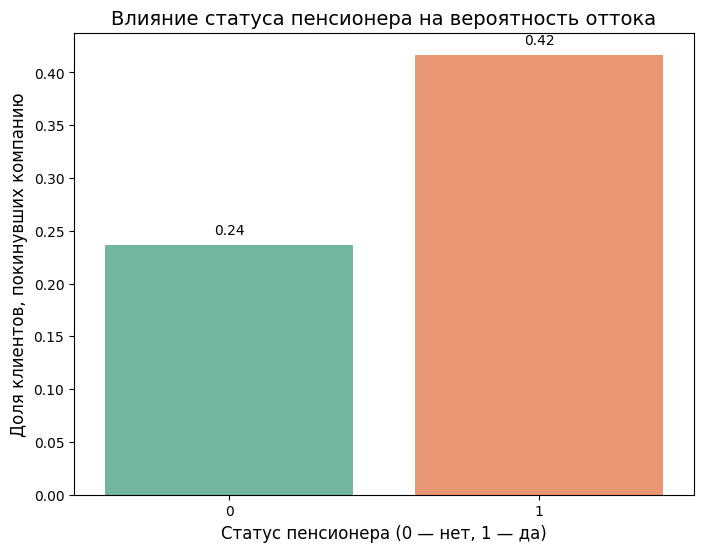

In [75]:
# Импортируем необходимые библиотеки для работы с данными и визуализации
import seaborn as sns  # Библиотека для создания красивых графиков
import matplotlib.pyplot as plt  # Библиотека для построения графиков
import pandas as pd  # Библиотека для работы с табличными данными

# Преобразование столбца 'Churn' в числовые значения (Yes -> 1, No -> 0)
# Это необходимо для того, чтобы можно было вычислить среднюю долю оттока клиентов
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})  
# Метод .map() заменяет значения 'Yes' на 1 и 'No' на 0 в столбце 'Churn'

# Группировка данных по 'SeniorCitizen' и расчет средней доли оттока
# Мы группируем данные по столбцу 'SeniorCitizen' (0 — не пенсионеры, 1 — пенсионеры)
# и вычисляем среднее значение в столбце 'Churn' для каждой группы.
# Среднее значение в данном случае показывает долю клиентов, покинувших компанию.
churn_by_senior = df.groupby('SeniorCitizen')['Churn'].mean().reset_index()
# Метод .reset_index() преобразует результат группировки в DataFrame для удобства использования

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 6))  # Создаем новую фигуру с размерами 8x6 дюймов для графика
sns.barplot(data=churn_by_senior, x='SeniorCitizen', y='Churn', palette='Set2')  
# Функция sns.barplot() строит столбчатую диаграмму:
# - data: DataFrame с данными
# - x: Переменная для оси X (в нашем случае 'SeniorCitizen')
# - y: Переменная для оси Y (в нашем случае 'Churn')
# - palette: Цветовая палитра для столбцов ('Set2' — одна из предопределенных палитр Seaborn)

# Добавление подписей и заголовка
plt.title('Влияние статуса пенсионера на вероятность оттока', fontsize=14)  
# Устанавливаем заголовок графика с указанием его темы и размером шрифта 14
plt.xlabel('Статус пенсионера (0 — нет, 1 — да)', fontsize=12)  
# Подпись для оси X с описанием значений (0 — не пенсионер, 1 — пенсионер)
plt.ylabel('Доля клиентов, покинувших компанию', fontsize=12)  
# Подпись для оси Y с описанием, что показывает график (доля оттока)

# Отображение значений над столбцами
for index, value in enumerate(churn_by_senior['Churn']):  
    # Цикл проходит по каждому значению в столбце 'Churn' (доли оттока)
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', fontsize=10)  
    # Для каждого столбца добавляем текстовое значение над ним:
    # - index: Позиция столбца по оси X
    # - value + 0.01: Позиция текста по оси Y (немного выше вершины столбца)
    # - f'{value:.2f}': Значение с двумя знаками после запятой
    # - ha='center': Горизонтальное выравнивание текста по центру
    # - fontsize=10: Размер шрифта для текста

# Отображение графика
plt.show()  # Отображаем готовый график на экране

## Задание 2

Если у клиента подключен интернет, то ему доступны 6 дополнительных услуг, а именно: онлайн защита, онлайновое резервное копирование, защита устройства, наличие ТВ, наличие доступа к фильмам. Скорее всего, чтобы удержать клиента нам выгодно по-максимуму погружать его в нашу экосистему. Давайте посмотрим, зависит ли % оттекших клиентов от кол-ва услуг, которые у них были подключены (по клиентам, у кого подключен интернет) ? Одинаковая ли зависимость на разных типах интернета? Подберите тип визуализации и постройте график\диаграмму, который смог бы ответить на эти вопросы.

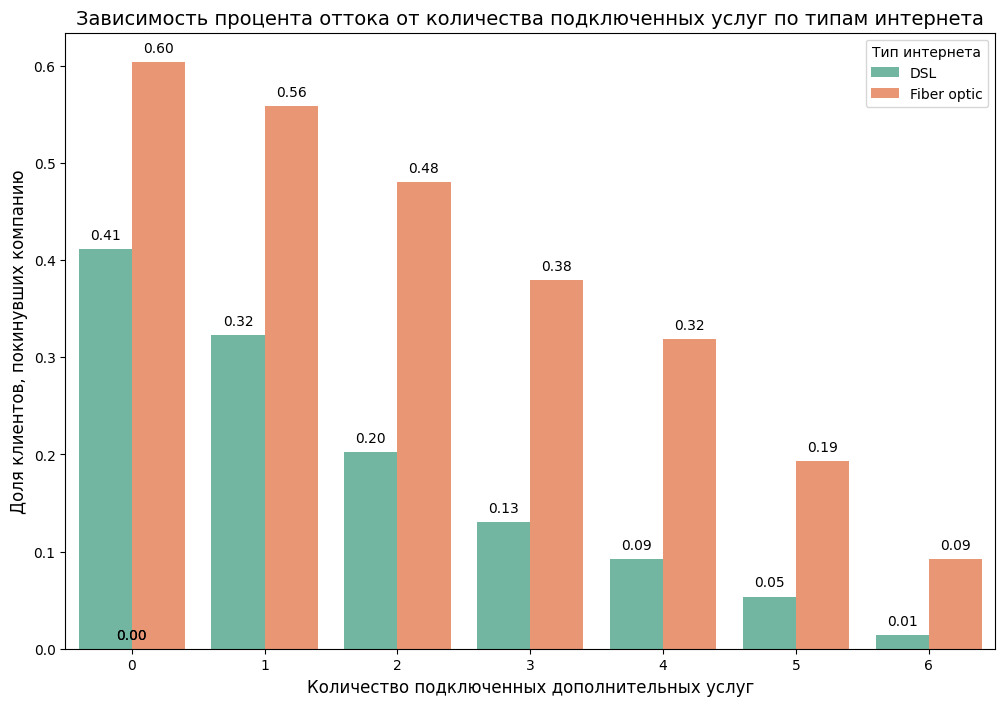

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Создаем новый столбец с количеством подключенных дополнительных услуг
additional_services = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Подсчитываем количество подключенных услуг для каждого клиента
df['NumAdditionalServices'] = df[additional_services].apply(
    lambda row: sum([1 if service == 'Yes' else 0 for service in row]), axis=1
)

# 2. Фильтруем данные, оставляя только клиентов с подключенным интернетом
df_with_internet = df[df['InternetService'] != 'No']

# 4. Группировка данных по количеству услуг и типу интернета, расчет средней доли оттока
churn_by_services_and_internet = (
    df_with_internet.groupby(['NumAdditionalServices', 'InternetService'])['Churn']
    .mean()
    .reset_index()
)

# 5. Построение групповой столбчатой диаграммы
plt.figure(figsize=(12, 8))
sns.barplot(
    data=churn_by_services_and_internet,
    x='NumAdditionalServices',  # Количество подключенных услуг
    y='Churn',                  # Доля оттока
    hue='InternetService',      # Группировка по типу интернета
    palette='Set2'
)

# 6. Добавление подписей и заголовка
plt.title('Зависимость процента оттока от количества подключенных услуг по типам интернета', fontsize=14)
plt.xlabel('Количество подключенных дополнительных услуг', fontsize=12)
plt.ylabel('Доля клиентов, покинувших компанию', fontsize=12)
plt.legend(title='Тип интернета', fontsize=10)

# 7. Отображение значений над столбцами
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2.,
        height + 0.01,
        f'{height:.2f}',
        ha='center',
        fontsize=10
    )

# 8. Отображение графика
plt.show()

In [79]:
churn_by_services_and_internet = (
    df_with_internet.groupby(['NumAdditionalServices', 'InternetService'])['Churn']
    .mean()
    .reset_index()
)

In [80]:
churn_by_services_and_internet

,NumAdditionalServices,InternetService,Churn
0,0,DSL,NaN
1,0,Fiber optic,NaN
2,1,DSL,NaN
3,1,Fiber optic,NaN
4,2,DSL,NaN
5,2,Fiber optic,NaN
6,3,DSL,NaN
7,3,Fiber optic,NaN
8,4,DSL,NaN
9,4,Fiber optic,NaN
